In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [88]:
bootPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/boot/ConA_first/aux_info/"
gibbsPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/gibbs/ConA_first/aux_info/"
truthFile='/mnt/scratch7/avi/test/shoal-paper/sim/out_1/truthA.tpm'

In [89]:
bootFiles=[bootPath+str(x)+'.sf' for x in range(1,101)]
gibbsFiles=[gibbsPath+str(x)+'.sf' for x in range(1,101)]

In [90]:
def readFiles(paths):
    for index, path in enumerate(paths):
        with open(path) as f:
            if index == 0:
                tpm = pd.read_table(f, header=0).set_index("Name").rename(columns={'TPM': '0'}).drop(['Length','EffectiveLength','NumReads'], 1)
            else:
                tpm[index] = pd.read_table(f, header=0).set_index("Name").drop(['Length','EffectiveLength','NumReads'], 1)
    return tpm
def readTruth(tfile):
    with open(tfile) as f:
        tpm = pd.read_table(f, header=0).set_index("Name")['TPM']
    return tpm
def dist_is_between(dist, truth):
    dist = sorted(dist)
    is_bet = []
    for skip in range(1, 25):
        if dist[skip] <= truth and truth <=dist[-(skip+1)]:
            is_bet.append(True)
        else:
            is_bet.append(False)
    return is_bet
def get_bet(var):
    bet = []
    for txp in var.index:
        dist = var.loc[txp]
        truth = truthData[txp]
        bet.append(dist_is_between(dist, truth))
    return bet
def get_series(df):
    series = []
    for txp in df.index:
        dist = sorted(df.loc[txp])
        cv=[]
        for skip in range(1, 25):
            ndist = np.array(dist[skip:-skip])
            cv.append(ndist.std()/ndist.mean())
        series.append(cv)
    return series

In [219]:
bootData = readFiles(bootFiles)
gibbsData = readFiles(gibbsFiles)
truthData = readTruth(truthFile)
keep = truthData>0
t = truthData[keep]
B = bootData[keep]
G = gibbsData[keep]
# Blog = np.log(B)
# Glog = np.log(G)
bmean = np.log(bootData[keep].mean(1))
gmean = np.log(gibbsData[keep].mean(1))
bootBet = get_bet(B)
gibbsBet = get_bet(G)
Bstats = (pd.DataFrame(bootBet).sum()/len(bootBet)).values
Gstats = (pd.DataFrame(gibbsBet).sum()/len(gibbsBet)).values

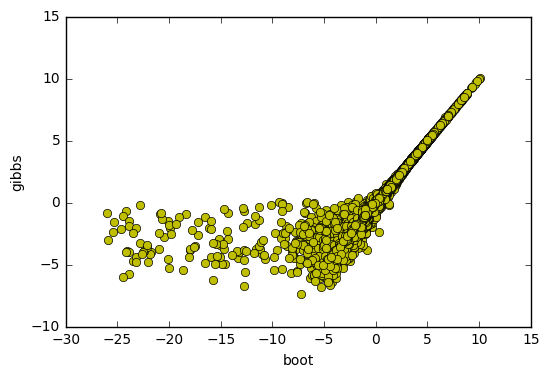

In [286]:
bmean = np.log(bootData[keep].mean(1))
gmean = np.log(gibbsData[keep].mean(1))
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.plot(bmean, gmean, 'yo')

###Change Below this

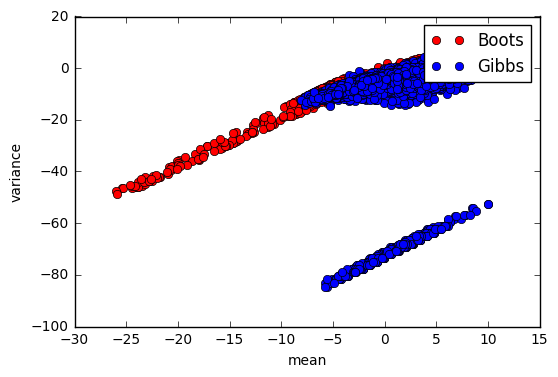

In [367]:
fig, ax = plt.subplots()
mb = bootData.mean(1)[keep].reset_index()[0]
mg = gibbsData.mean(1)[keep].reset_index()[0]
vb = bootData.var(1)[keep].reset_index()[0]
vg = gibbsData.var(1)[keep].reset_index()[0]
ax.plot(np.log(mb), np.log(vb),'ro', label='Boots')
ax.plot(np.log(mg), np.log(vg),'bo', label='Gibbs')
ax.legend(loc='upper right')
plt.xlabel('mean')
plt.ylabel('variance')

In [353]:
len(mb)

26959

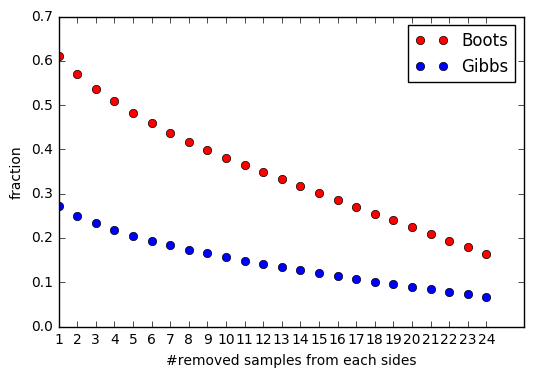

In [288]:
fig, ax = plt.subplots()
ax.plot(Bstats, 'ro', label='Boots')
ax.plot(Gstats, 'bo', label='Gibbs')
ax.legend(loc='upper right')
plt.xticks(range(24), range(1, 25))
plt.xlabel('#removed samples from each sides')
plt.ylabel('fraction')

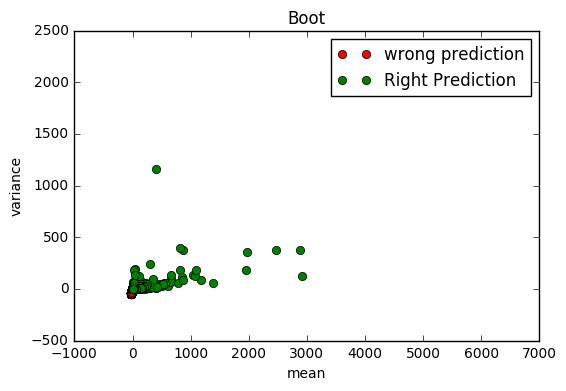

In [290]:
fig, ax = plt.subplots()
boolBBet = pd.DataFrame(bootBet)[1].values
ax.plot(np.log(bootData.mean(1)), np.log(bootData.var(1)),'ro', label='wrong prediction')
rightB = B[boolBBet]
ax.plot(rightB.mean(1), rightB.var(1),'go', label='Right Prediction')
ax.legend(loc='upper right')
plt.xlabel('mean')
plt.ylabel('variance')
plt.title('Boot')

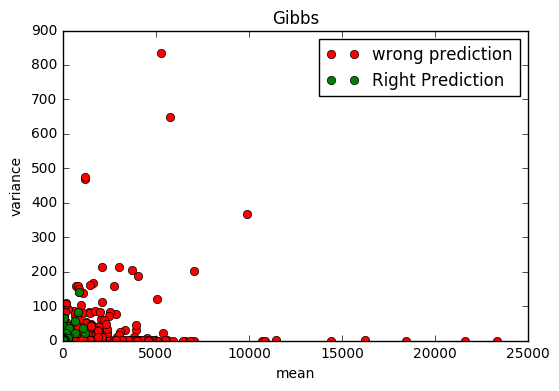

In [292]:
fig, ax = plt.subplots()
boolGBet = pd.DataFrame(gibbsBet)[1].values
ax.plot(gibbsData.mean(1), gibbsData.var(1),'ro', label='wrong prediction')
rightG = G[boolGBet]
ax.plot(rightG.mean(1), rightG.var(1),'go', label='Right Prediction')
ax.legend(loc='upper right')
plt.xlabel('mean')
plt.ylabel('variance')
plt.title('Gibbs')

In [136]:
abs(B.mean(1)-truthData).sum()/len(truthData)

3.2246804038110453

In [135]:
abs(G.mean(1)-truthData).sum()/len(truthData)

3.2554739957568821

In [13]:
df = pd.concat([abs(B.max(1)-truthData), abs(B.min(1)-truthData)], axis=1)
df.min(1).sum()/len(truthData)

2.4955121468724064

In [14]:
df = pd.concat([abs(G.max(1)-truthData), abs(G.min(1)-truthData)], axis=1)
df.min(1).sum()/len(truthData)

2.8914307503222458

In [141]:
k = np.log(truthData)

In [142]:
t = np.log(truthData)
b = Blog.mean(1).replace([np.inf, -np.inf], 0)
g = Glog.mean(1).replace([np.inf, -np.inf], 0)

In [143]:
abs(b-t).sum()/len(t)

0.68082734386752286

In [144]:
abs(g-t).sum()/len(t)

0.48816334279416213

In [153]:
abs(Glog.replace([-np.inf], 0).mean(1)-np.log(truthData)).sum()/len(truthData)

0.37054241018772421

In [154]:
abs(Blog.replace([-np.inf], 0).mean(1)-np.log(truthData)).sum()/len(truthData)

0.46668531590163292

In [152]:
np.array([0, float('-inf')]).mean()

-inf

In [231]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [249]:
bootData = readFiles(bootFiles)
gibbsData = readFiles(gibbsFiles)
truthData = readTruth(truthFile)

In [226]:
#both zero
keep = (truthData!=0) & (gibbsData.mean(1)==0) & (bootData.mean(1)==0)
t = truthData[keep]
b = bootData[keep].median(1)
g = gibbsData[keep].median(1)
print sum(keep), sum(keep)/float(len(keep))
print abs(b-t).sum()/len(t)
print abs(g-t).sum()/len(t)

272 0.00290853097799
0.160156806995
0.160156806995


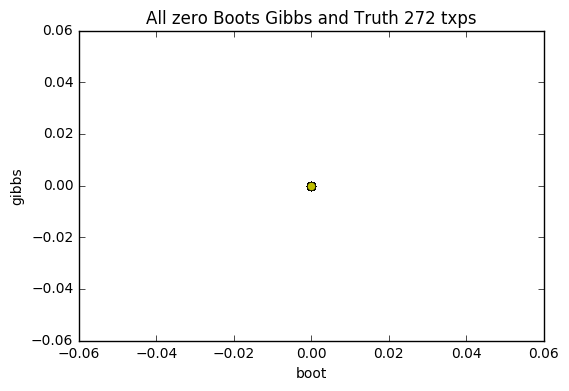

In [220]:
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.plot(b, g, 'yo')
plt.title('All zero Boots Gibbs and Truth 272 txps')

In [227]:
#boot zero
keep = (truthData!=0) & (gibbsData.mean(1)!=0) & (bootData.mean(1)==0)
t = truthData[keep]
b = bootData[keep].median(1)
g = gibbsData[keep].median(1)
print sum(keep), sum(keep)/float(len(keep))
print abs(b-t).sum()/len(t)
print abs(g-t).sum()/len(t)

826 0.00883252421994
0.147919741227
0.144493306696


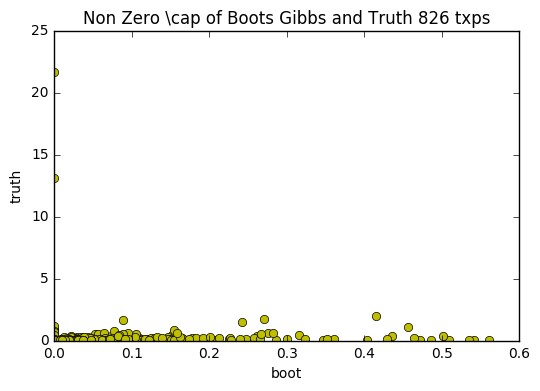

In [222]:
plt.xlabel('boot')
plt.ylabel('truth')
plt.plot(g, t, 'yo')
plt.title('Non Zero \cap of Boots Gibbs and Truth 826 txps')

In [230]:
#gibbs zero
keep = (truthData!=0) & (gibbsData.mean(1)==0) & (bootData.mean(1)!=0)
t = truthData[keep]
b = bootData[keep].median(1)
g = gibbsData[keep].median(1)
print sum(keep), sum(keep)/float(len(keep))
print abs(b-t).sum()/len(t)
print abs(g-t).sum()/len(t)

1278 0.0136658183451
65.6063616346
73.4321031305


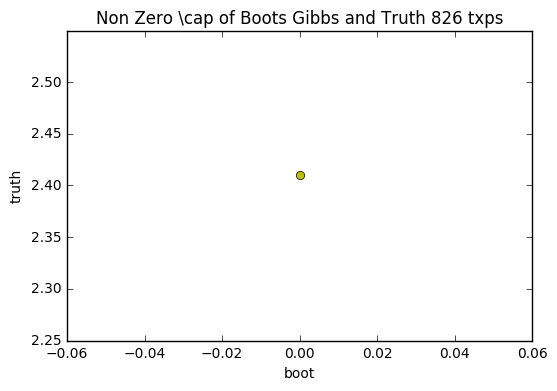

In [224]:
plt.xlabel('boot')
plt.ylabel('truth')
plt.plot(b, t, 'yo')
plt.title('Non Zero \cap of Boots Gibbs and Truth 826 txps')

In [229]:
#both zero
keep = (truthData!=0) & (gibbsData.mean(1)==0) & (bootData.mean(1)==0)
t = truthData[keep]
b = bootData[keep].median(1)
g = gibbsData[keep].median(1)
print sum(keep), sum(keep)/float(len(keep))
print abs(b-t).sum()/len(t)
print abs(g-t).sum()/len(t)

272 0.00290853097799
0.160156806995
0.160156806995


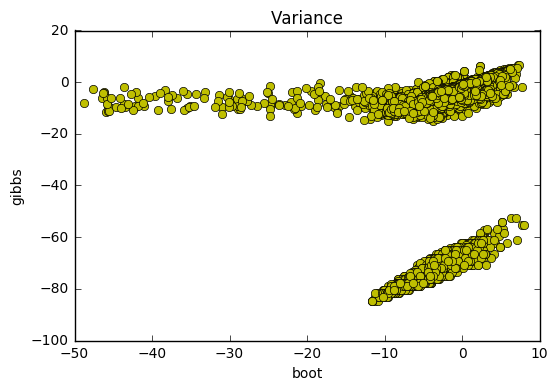

In [311]:
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.plot(np.log(bootData[keep].var(1)), np.log(gibbsData[keep].var(1)), 'yo')
plt.title('Variance')

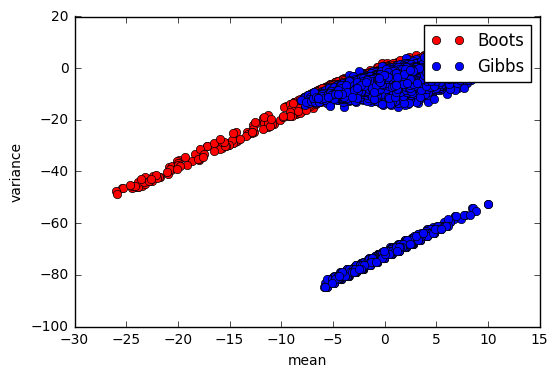

In [326]:
fig, ax = plt.subplots()
ax.plot(np.log(bootData[keep].mean(1)), np.log(bootData[keep].var(1)),'ro', label='Boots')
ax.plot(np.log(gibbsData[keep].mean(1)), np.log(gibbsData[keep].var(1)),'bo', label='Gibbs')
ax.legend(loc='upper right')
plt.xlabel('mean')
plt.ylabel('variance')

In [244]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


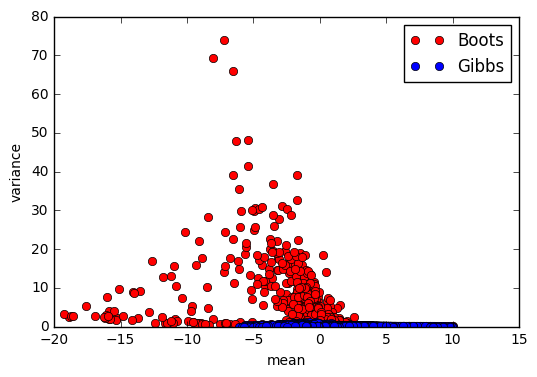

In [254]:
fig, ax = plt.subplots()
ax.plot(np.log(bootData).mean(1), np.log(bootData).var(1),'ro', label='Boots')
ax.plot(np.log(gibbsData).mean(1), np.log(gibbsData).var(1),'bo', label='Gibbs')
ax.legend(loc='upper right')
plt.xlabel('mean')
plt.ylabel('variance')

In [306]:
sum(np.log(gibbsData[keep].mean(1)) == float('-inf'))

273

In [307]:
sum(np.log(bootData[keep].mean(1)) == float('-inf'))

1098

In [308]:
sum(np.log(bootData[keep]).mean(1) == float('-inf'))

6234

In [309]:
sum(np.log(gibbsData[keep]).mean(1) == float('-inf'))

2327

In [300]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


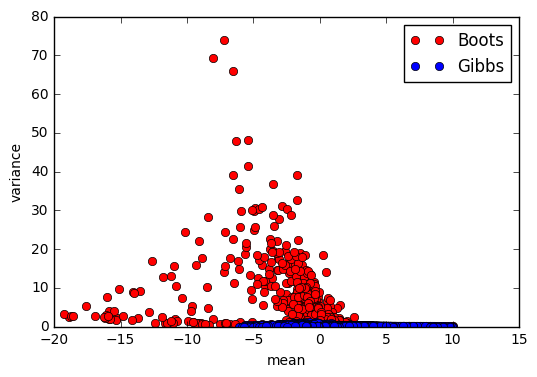

In [312]:
fig, ax = plt.subplots()
ax.plot(np.log(bootData).mean(1), np.log(bootData).var(1),'ro', label='Boots')
ax.plot(np.log(gibbsData).mean(1), np.log(gibbsData).var(1),'bo', label='Gibbs')
ax.legend(loc='upper right')
plt.xlabel('mean')
plt.ylabel('variance')

In [338]:
aha = pd.DataFrame(bootBet).sum(1) == 0

In [324]:
len(pd.DataFrame(bootBet))

26959

In [327]:
len(bootData[keep].mean(1))

26959

In [366]:
x = mb.reset_index()[0]
x[aha]

0            0.000000
4           20.666263
5           13.891458
6           14.904813
7            3.563257
8            7.988431
10          53.401320
12          25.891374
21           3.975587
22          27.023409
27           0.000000
29         144.090327
33          29.199546
41           2.139074
42           0.909550
43           3.777493
45           0.789527
48          95.174089
53          19.783420
54          10.860316
55          26.637858
57          13.933628
58           7.079104
59           6.089579
60           0.047794
61           0.710968
62          14.466251
65          42.950022
67          13.862720
69           1.508776
             ...     
26866        0.281224
26868        3.192207
26872        0.003165
26875        3.751693
26877        3.290339
26879        0.068175
26880       46.276586
26883        8.303096
26890        1.350568
26893        0.056292
26894       15.841703
26899        0.290992
26909        0.000000
26925        0.000000
26930     

In [357]:
pd.DataFrame(mb)[aha]

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series key provided

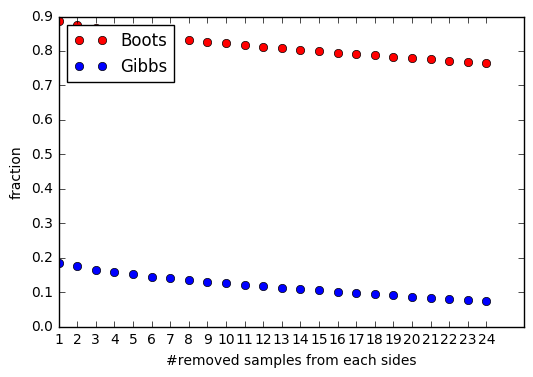

In [182]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

bootPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/boot/ConA_first/aux_info/"
gibbsPath="/mnt/scratch7/avi/test/shoal-paper/salmonData/gibbs_quant/ConA_first/aux_info/"
truthFile='/mnt/scratch7/avi/test/shoal-paper/sim/out_1/truthA.tpm'

bootFiles=[bootPath+str(x)+'.sf' for x in range(1,101)]
gibbsFiles=[gibbsPath+str(x)+'.sf' for x in range(1,101)]

bootData = readFiles(bootFiles)
gibbsData = readFiles(gibbsFiles)
truthData = readTruth(truthFile)

# keep = truthData>0
# truthData = truthData[keep]
# B = bootData[keep]
# G = gibbsData[keep]

bootBet = get_bet(bootData)
gibbsBet = get_bet(gibbsData)
Bstats = (pd.DataFrame(bootBet).sum()/len(bootBet)).values
Gstats = (pd.DataFrame(gibbsBet).sum()/len(gibbsBet)).values

fig, ax = plt.subplots()
ax.plot(Bstats, 'ro', label='Boots')
ax.plot(Gstats, 'bo', label='Gibbs')
ax.legend(loc='upper left')
plt.xticks(range(24), range(1, 25))
plt.xlabel('#removed samples from each sides')
plt.ylabel('fraction')

In [52]:
def readFiles(paths):
    for index, path in enumerate(paths):
        with open(path) as f:
            if index == 0:
                tpm = pd.read_table(f, header=0).set_index("Name").rename(columns={'TPM': '0'}).drop(['Length','EffectiveLength','NumReads'], 1)
            else:
                tpm[index] = pd.read_table(f, header=0).set_index("Name").drop(['Length','EffectiveLength','NumReads'], 1)
    return tpm
def readTruth(tfile):
    with open(tfile) as f:
        tpm = pd.read_table(f, header=0).set_index("Name")['TPM']
    return tpm
def dist_is_between(dist, truth):
    dist = sorted(dist)
    is_bet = []
    for skip in range(1, 25):
        if dist[skip] <= truth and truth <=dist[-(skip+1)]:
            is_bet.append(True)
        else:
            is_bet.append(False)
    return is_bet
def get_bet(var):
    bet = []
    for txp in var.index:
        dist = var.loc[txp]
        truth = truthData[txp]
        bet.append(dist_is_between(dist, truth))
    return bet

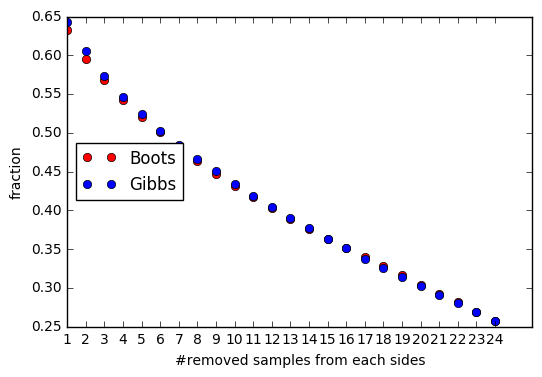

In [181]:
fig, ax = plt.subplots()
ax.plot(Bstats, 'ro', label='Boots')
ax.plot(Gstats, 'bo', label='Gibbs')
ax.legend(loc='center left')
plt.xticks(range(24), range(1, 25))
plt.xlabel('#removed samples from each sides')
plt.ylabel('fraction')

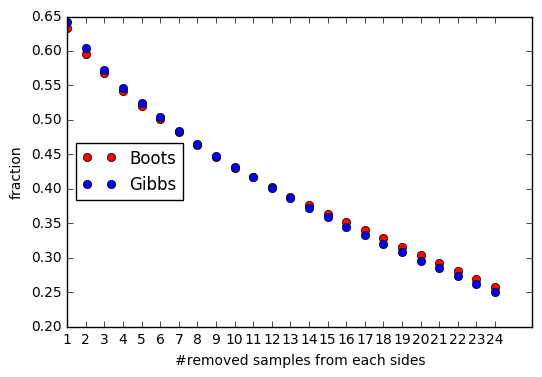

In [9]:
fig, ax = plt.subplots()
ax.plot(Bstats, 'ro', label='Boots')
ax.plot(Gstats, 'bo', label='Gibbs')
ax.legend(loc='center left')
plt.xticks(range(24), range(1, 25))
plt.xlabel('#removed samples from each side')
plt.ylabel('fraction')

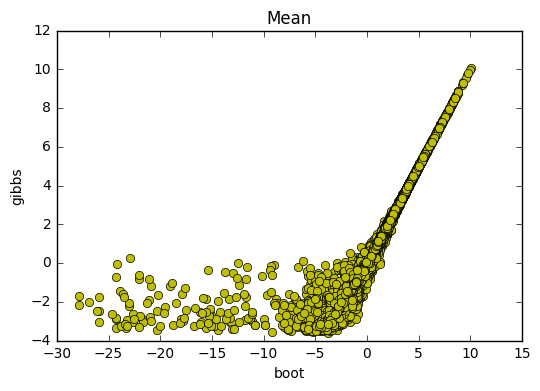

In [189]:
bmean = np.log(bootData[keep].mean(1))
gmean = np.log(gibbsData[keep].mean(1))
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.plot(bmean, gmean, 'yo')
plt.title("Mean")

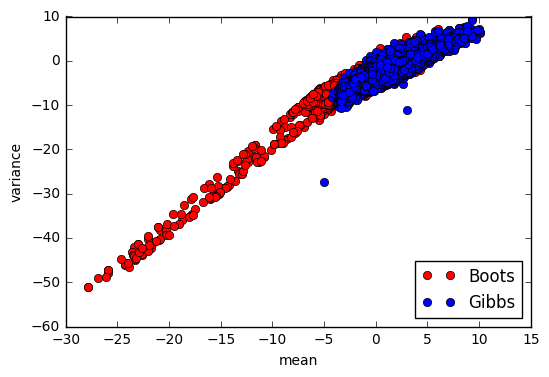

In [190]:
fig, ax = plt.subplots()
mb = bootData.mean(1)[keep].reset_index()[0]
mg = gibbsData.mean(1)[keep].reset_index()[0]
vb = bootData.var(1)[keep].reset_index()[0]
vg = gibbsData.var(1)[keep].reset_index()[0]
ax.plot(np.log(mb), np.log(vb),'ro', label='Boots')
ax.plot(np.log(mg), np.log(vg),'bo', label='Gibbs')
ax.legend(loc='lower right')
plt.xlabel('mean')
plt.ylabel('variance')

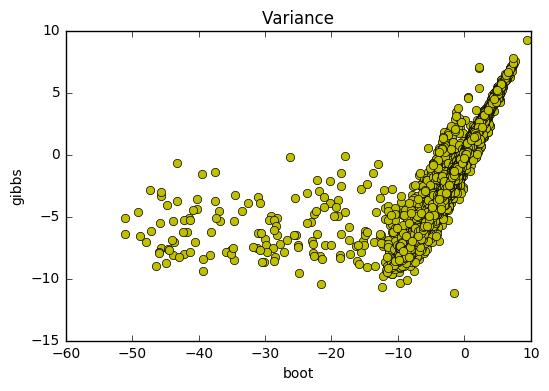

In [191]:
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.plot(np.log(bootData[keep].var(1)), np.log(gibbsData[keep].var(1)), 'yo')
plt.title('Variance')

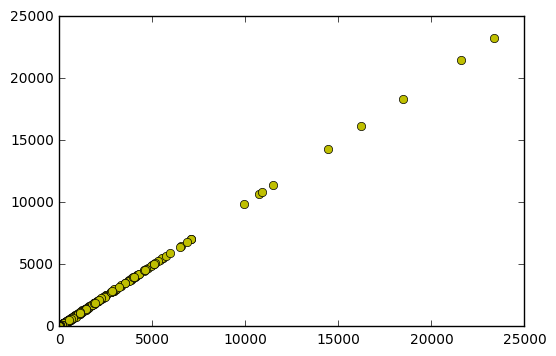

In [16]:
plt.plot(bootData.mean(1), gibbsData.mean(1), 'yo')

In [186]:
out = (truthData==0.0)

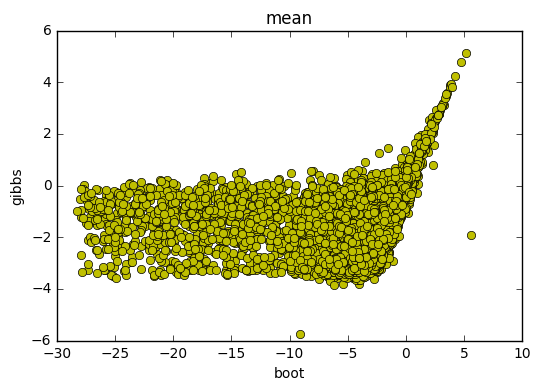

In [187]:
plt.plot(np.log(bootData[out].mean(1)), np.log(gibbsData[out].mean(1)), 'yo')
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.title("mean")

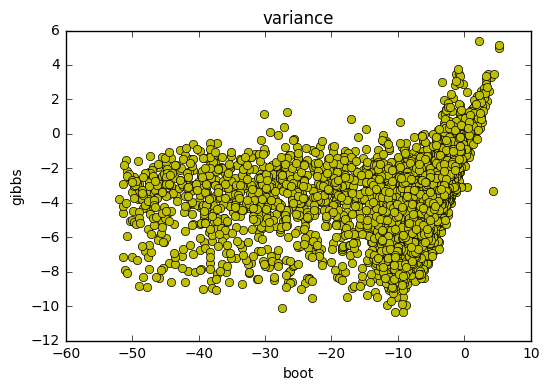

In [188]:
plt.plot(np.log(bootData[out].var(1)), np.log(gibbsData[out].var(1)), 'yo')
plt.xlabel('boot')
plt.ylabel('gibbs')
plt.title("variance")

In [39]:
truthData = readTruth(truthFile)

In [263]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [108]:
g = gibbsData
gMin = g.min(1)
sum(gMin == 0)

10

In [110]:
b = bootData
bMin = b.min(1)
sum(bMin == 0)

72317

In [107]:
sum(gMin == 0)

10

In [ ]:
gMin = g.min(1)

In [114]:
g[g < 1e-2] = 0.0

In [117]:
g = gibbsData
gMin = g.min(1)
g[g < 1e-8] = 0.0
sum(gMin == 0)

59463

In [132]:
g = gibbsData
g[g < 1e-8] = 0.0
gMin = g.min(1)
sum(gMin == 0)

6926

In [91]:
bootData = readFiles(bootFiles)
gibbsData = readFiles(gibbsFiles)
truthData = readTruth(truthFile)

In [176]:
b = bootData
bMin = b.min(1)
sum(bMin == 0)

72317

In [177]:
g = gibbsData
g[g < 1e-8] = 0.0
gMin = g.min(1)
sum(gMin == 0)

3259

In [147]:
g = gibbsData
gMin = g.min(1)
g[g < 1e-8] = 0.0
sum(gMin == 0)

8

In [137]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [179]:
g = gibbsData
gMin = g.min(1)
sum(gMin == 0)

0

In [ ]:
sum((t['TPM'] >= gtpm.min(axis=1)) & (t['TPM'] <= gtpm.max(axis=1)))

In [150]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [160]:
sum((truthData >= gibbsData.min(axis=1)) & (truthData <= gibbsData.max(axis=1)))

18799

In [161]:
sum((truthData >= bootData.min(axis=1)) & (truthData <= bootData.max(axis=1)))

84484

In [163]:
keep = truthData>0

In [165]:
sum(keep)

26959

In [167]:
keep = truthData>0
sum((truthData[keep] >= gibbsData[keep].min(axis=1)) & (truthData[keep] <= gibbsData[keep].max(axis=1)))

18789

In [168]:
sum((truthData[keep] >= bootData[keep].min(axis=1)) & (truthData[keep] <= bootData[keep].max(axis=1)))

18554

In [169]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


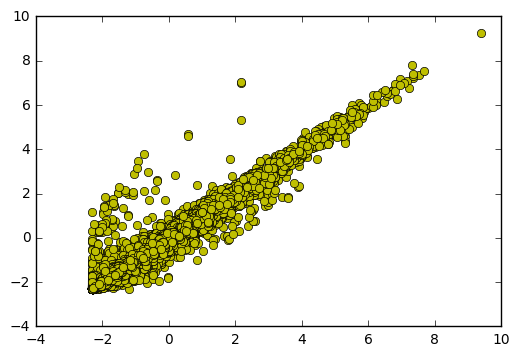

In [248]:
plt.plot(np.log(bootData[keep].var(1)+0.1), np.log(gibbsData[keep].var(1)+0.1), 'yo')

In [249]:
gibbsData = gibbsData[keep]
bootData = bootData[keep]
truthData = truthData[keep]

bmin = bootData.min(1)
bmax = bootData.max(1)
gmin = gibbsData.min(1)
gmax = gibbsData.max(1)

br = ((bmin <= truthData) & (truthData <= bmax)) & ((gmin <= truthData) & (truthData <= gmax))
bor = ((bmin <= truthData) & (truthData <= bmax)) & ((gmin > truthData) | (truthData > gmax))
gir = ((bmin > truthData) | (truthData > bmax)) & ((gmin <= truthData) & (truthData <= gmax))
bw = ((bmin > truthData) | (truthData > bmax)) & ((gmin > truthData) | (truthData > gmax))

In [250]:
sum(bor)+sum(br)+sum(gir)+sum(bw)

26959

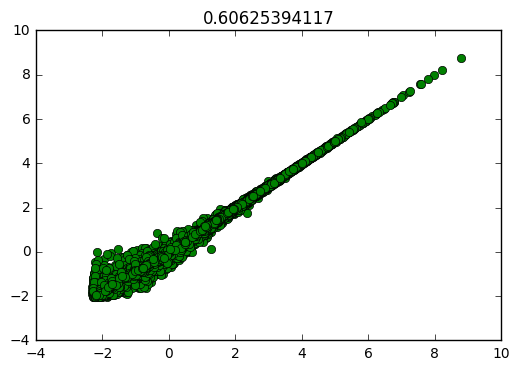

In [256]:
plt.plot(np.log(bootData.mean(1)[br]+0.1), np.log(gibbsData.mean(1)[br]+0.1), 'go')
plt.title(sum(br)/26959.0)

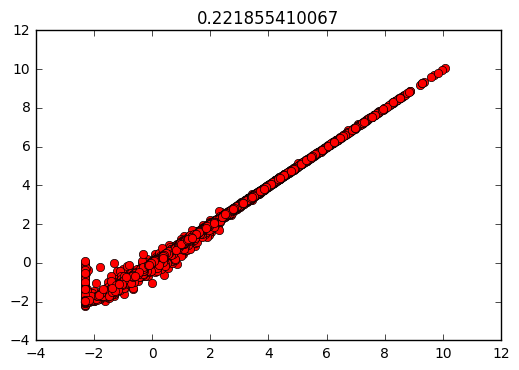

In [260]:
plt.plot(np.log(bootData.mean(1)[bw]+0.1), np.log(gibbsData.mean(1)[bw]+0.1), 'ro')
plt.title(sum(bw)/26959.0)

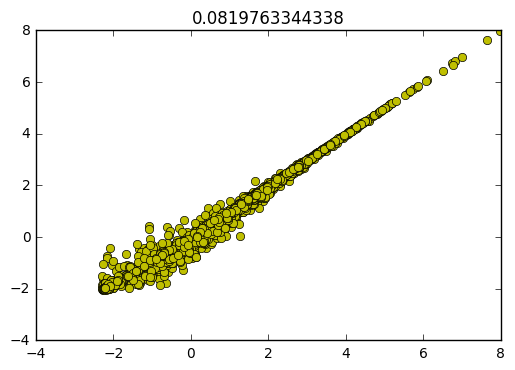

In [261]:
plt.plot(np.log(bootData.mean(1)[bor]+0.1), np.log(gibbsData.mean(1)[bor]+0.1), 'yo')
plt.title(sum(bor)/26959.0)

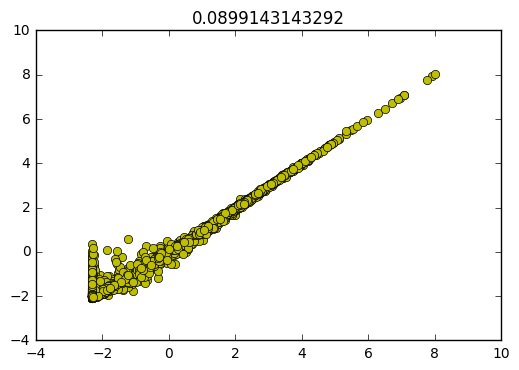

In [262]:
plt.plot(np.log(bootData.mean(1)[gir]+0.1), np.log(gibbsData.mean(1)[gir]+0.1), 'yo')
plt.title(sum(gir)/26959.0)

In [5]:
bootData = readFiles(bootFiles)
gibbsData = readFiles(gibbsFiles)
truthData = readTruth(truthFile)
# keep = truthData>0
# t = truthData[keep]
# B = bootData[keep]
# G = gibbsData[keep]

In [6]:
bdf = pd.DataFrame(get_series(bootData))

In [7]:
gdf = pd.DataFrame(get_series(gibbsData))

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f608ed01750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f608e2ef390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f608cf778d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f608cf5dc90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f60901ecd50>,
  <matplotlib.lines.Line2D at 0x7f6089d62290>]}

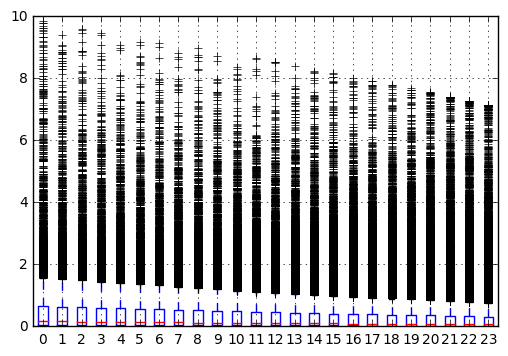

In [8]:
bdf.dropna().boxplot()

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f6089b58b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6089b6f9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6089b63cd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6089b63690>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6089b58c90>,
  <matplotlib.lines.Line2D at 0x7f608e5ccc10>]}

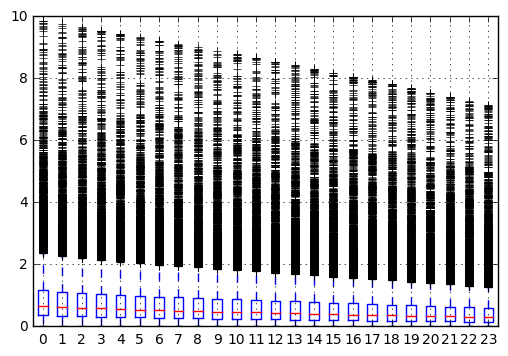

In [9]:
gdf.dropna().boxplot()

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f608fc13590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f608fc284d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f608fc327d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f608fc32190>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f608fc13790>,
  <matplotlib.lines.Line2D at 0x7f608f604650>]}

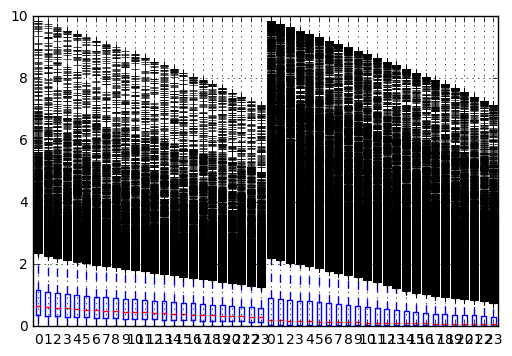

In [10]:
pd.concat([gdf, bdf], axis=1).boxplot()

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f608ec3a990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f608ec542d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f608ec54ed0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f608ec54ad0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f608ec3aa90>,
  <matplotlib.lines.Line2D at 0x7f608eb70b10>]}

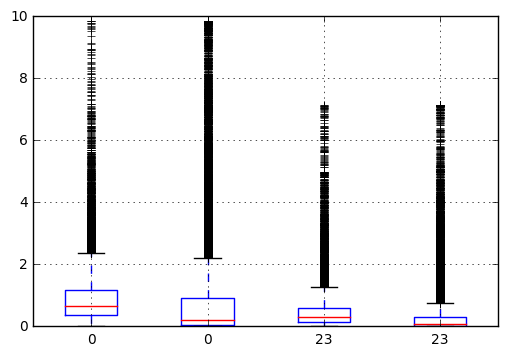

In [11]:
pd.concat([gdf[0], bdf[0], gdf[23], bdf[23]], axis=1).boxplot()

In [12]:
out = (truthData==0)
t = truthData[out]
B = bootData[out]
G = gibbsData[out]

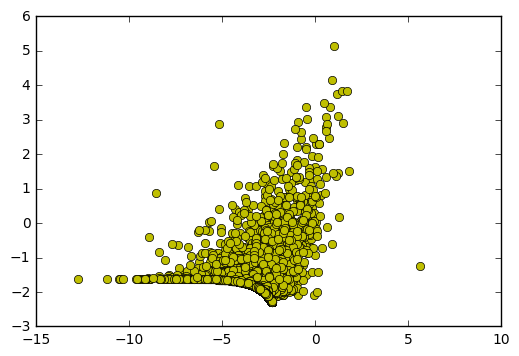

In [13]:
plt.plot(np.log(B.mean(1)-G.mean(1)+0.1), np.log(G.mean(1)+0.1), 'yo')

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
import seaborn as sns

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f608db97a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f608dbae950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f608dbb8c50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f608dbb8610>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f608db97c10>,
  <matplotlib.lines.Line2D at 0x7f608c22ae50>]}

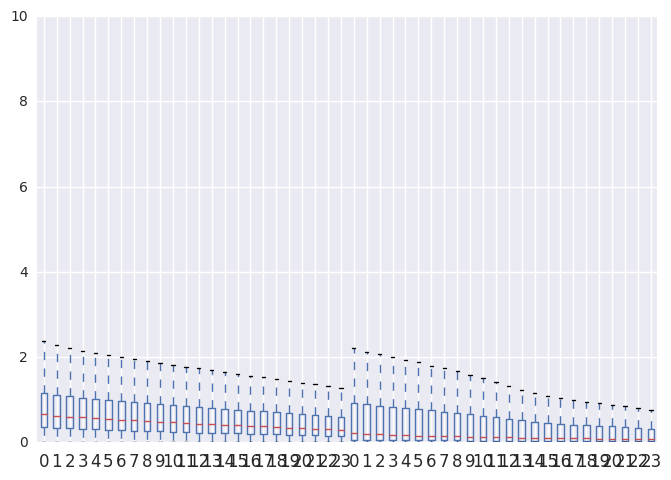

In [16]:
pd.concat([gdf, bdf], axis=1).boxplot()

/home/linuxbrew/.linuxbrew/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f608b90f990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f608b9242d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f608b924f90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f608b924ad0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f608b90fa90>,
  <matplotlib.lines.Line2D at 0x7f608ba03910>]}

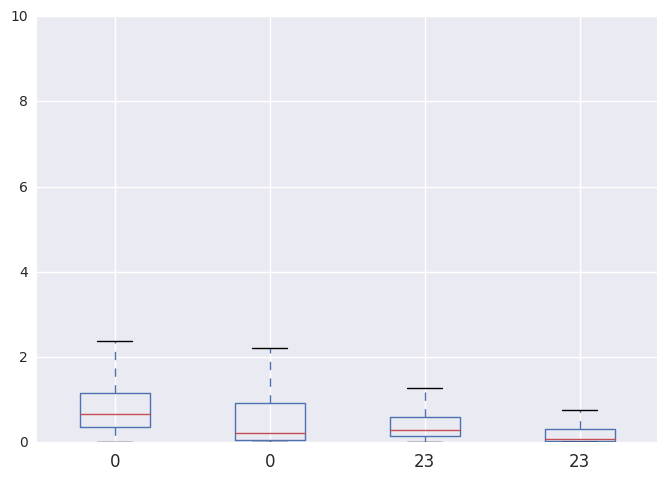

In [17]:
pd.concat([gdf[0], bdf[0], gdf[23], bdf[23]], axis=1).boxplot()

In [20]:
sns.violinplot()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.263148,0.249421,0.238464,0.228398,0.220302,0.213035,0.205265,0.197542,0.189703,0.182777,...,0.149170,0.142671,0.135932,0.129916,0.123948,0.118128,0.112118,0.106198,0.100007,0.094086
8,0.237316,0.227830,0.218389,0.209524,0.202243,0.195656,0.189309,0.183778,0.178382,0.173488,...,0.149449,0.144364,0.140009,0.135373,0.130320,0.125303,0.120216,0.115560,0.110720,0.105815
9,0.160069,0.154149,0.149756,0.145493,0.141097,0.136966,0.133032,0.129245,0.125172,0.120914,...,0.103196,0.099711,0.096473,0.093117,0.089519,0.086445,0.083429,0.080486,0.077490,0.074355


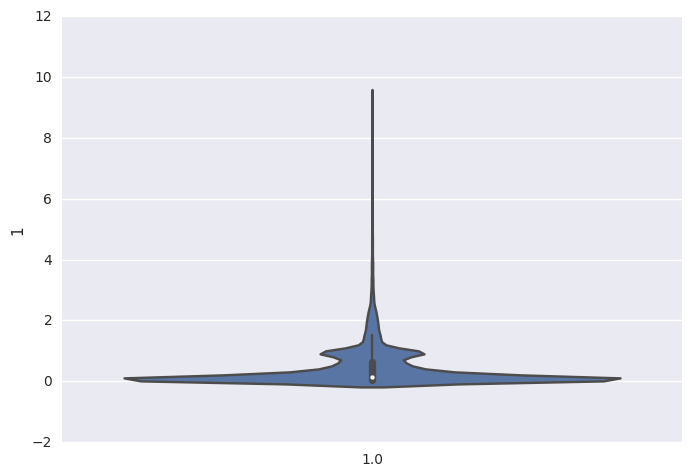

In [33]:
sns.violinplot(y=bdf.dropna().loc[:,1], x=np.ones(len(bdf.dropna().loc[:,1])))

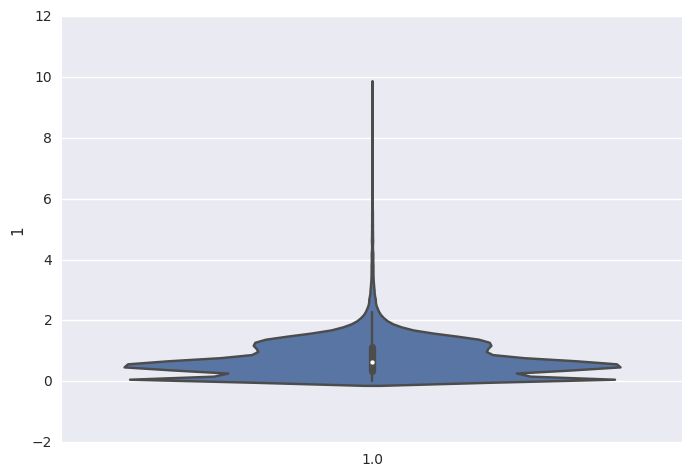

In [29]:
sns.violinplot(y=gdf.dropna().loc[:,1], x=np.ones(93518))

In [34]:
len(bdf.dropna().loc[:,1])

31518

In [38]:
sum(bootData['0'] == 0)

64511

In [39]:
sum(truthData  == 0 )

66559

In [42]:
gdf['Name'] = gibbsData.index

In [44]:
gdf.set_index('Name', inplace='True')

In [64]:
k = gdf[truthData > 0.2]

In [60]:
k[0]

Name
ENST00000360321    0.137716
ENST00000400269    0.045829
ENST00000382352    0.000139
ENST00000342665    0.004623
ENST00000609179    0.086636
ENST00000217233    0.100007
ENST00000449710    0.096544
ENST00000422053    0.106141
ENST00000411647    0.041428
ENST00000354200    0.011051
ENST00000217244    0.014020
ENST00000460062    0.033338
ENST00000608066    0.119875
ENST00000381962    0.050370
ENST00000541082    0.954245
ENST00000505691    0.184833
ENST00000381899    0.018404
ENST00000435720    0.236939
ENST00000381898    0.032187
ENST00000381715    0.072709
ENST00000400137    0.015381
ENST00000381719    0.066015
ENST00000476071    0.039110
ENST00000216879    0.082667
ENST00000381658    0.023849
ENST00000429387    0.131442
ENST00000569387    0.032504
ENST00000564763    0.104316
ENST00000344103    0.069402
ENST00000381583    0.221442
                     ...   
ENST00000583578    0.214691
ENST00000585258    0.180047
ENST00000526111    0.081409
ENST00000586722    0.165303
ENST00000329101

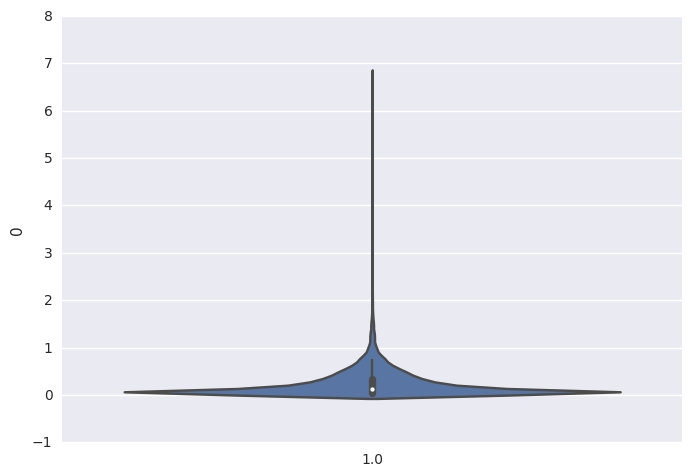

In [73]:
k = gdf[truthData > 0.01]
sns.violinplot(y=k[0], x=np.ones(len(k)))

In [71]:
bdf['Name'] = bootData.index
bdf.set_index('Name', inplace='True')
b = bdf[truthData > 0.01]

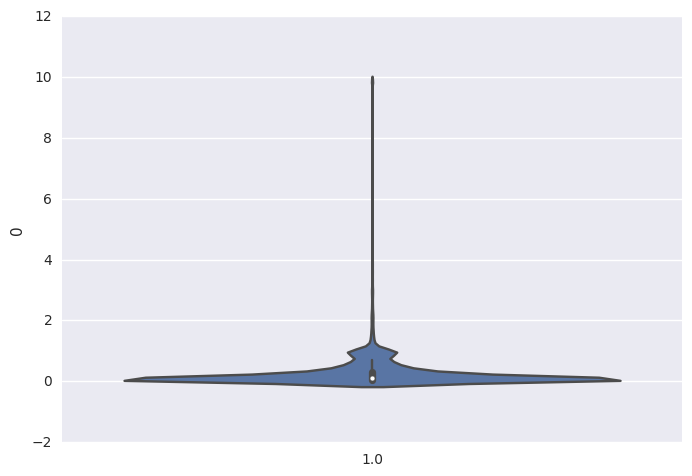

In [82]:
sns.violinplot(y=b[0], x=np.ones(len(b)))

In [99]:
import scipy.stats

In [85]:
scipy.stats.mannwhitneyu()

<function scipy.stats.stats.mannwhitneyu>

In [92]:
bdf = pd.DataFrame(get_series(bootData))

In [93]:
gdf = pd.DataFrame(get_series(gibbsData))

In [95]:
bmin = bootData.min(1)
bmax = bootData.max(1)
gmin = gibbsData.min(1)
gmax = gibbsData.max(1)

In [96]:
b = bmax - bmin
g = gmax - gmin

In [118]:
scipy.stats.mannwhitneyu(b, g, alternative='greater')

MannwhitneyuResult(statistic=2223463172.0, pvalue=1.0)

In [120]:
scipy.stats.mannwhitneyu(b, g, alternative='less')

MannwhitneyuResult(statistic=2223463172.0, pvalue=0.0)

In [121]:
scipy.stats.mannwhitneyu(g, b, alternative='greater')

MannwhitneyuResult(statistic=6522153152.0, pvalue=0.0)

In [122]:
scipy.stats.mannwhitneyu(g, b, alternative='less')

MannwhitneyuResult(statistic=6522153152.0, pvalue=1.0)

In [123]:
scipy.stats.mannwhitneyu(g, b, alternative='two-sided')

MannwhitneyuResult(statistic=6522153152.0, pvalue=0.0)

In [124]:
scipy.stats.mannwhitneyu(b, g, alternative='two-sided')

MannwhitneyuResult(statistic=2223463172.0, pvalue=0.0)

In [129]:
scipy.stats.mannwhitneyu(b[truthData>1], g[truthData>1], alternative='greater')


MannwhitneyuResult(statistic=154691229.0, pvalue=0.050657211635472238)

In [130]:
scipy.stats.mannwhitneyu(g[truthData>1], b[truthData>1], alternative='greater')

MannwhitneyuResult(statistic=151593772.0, pvalue=0.94934289862077115)

In [156]:
count = 0
for x in gibbsData[truthData>0].index:
    s, p = scipy.stats.levene(gibbsData.loc[x], bootData.loc[x], center='median')
    if p <= 0.05:
        count += 1
print count

7135


In [154]:
len(gibbsData[truthData>0])

26959

In [155]:
7135/26959.0

0.2646611521198858